In [2]:
%matplotlib inline
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from jubatus import Regression
from jubatus.common import Datum

In [3]:
def train_and_estimate(name):
    regression = Regression('127.0.0.1', 9199, "")
    regression.clear()

    # 学習用データサイズを設定
    n_train = int(len(data)*0.7)

    # 可視化用
    answer = []
    prediction = []
    index = df.index[1:]

    for i in range(len(data)-1):
        # 1期前のデータを入力にして、現在の値を予測する
        x = Datum({"data": data[i]})
        y_true = data[i+1] 

        # [0, n_train]までは学習期間、[n_train:]で予測を実施
        if i > n_train:
            y_pred = regression.estimate([x])[0]  # 予測
        else:
            y_pred = y_true  # 学習期間なので何もしない

        # 現在の値を取得できたので、学習を行う
        regression.train([[y_true, x]])

        # 可視化用に結果を保存
        answer.append(y_true)
        prediction.append(y_pred)

    # jubadump用にモデルを保存    
    regression.save(name)

    # RMSEを計算
    from sklearn.metrics import mean_squared_error
    print(np.sqrt(mean_squared_error(answer[n_train:], prediction[n_train:])))

    # 可視化
    df_result = pd.DataFrame({"answer": answer, "predict": prediction}, index=index)
    df_result.plot(figsize=(18,12))

In [55]:
def train_and_estimate2(name):
    regression = Regression('127.0.0.1', 9199, "")
    regression.clear()

    # 学習用データサイズを設定
    n_train = int(len(data)*0.9)

    # 可視化用
    answer = []
    prediction = []
    index = df.index[1:]

    for i in range(len(data)-1):
        # 1期前のデータを入力にして、現在の値を予測する
        x = Datum({"data": data[i]})
        y_true = data[i+1] 

        # [0, n_train]までは学習期間、[n_train:]で予測を実施
        if i > n_train:
            y_pred = regression.estimate([Datum({"data": prediction[-1]})])[0]  # 予測
            prediction.append(y_pred)
        else:
            regression.train([[float(y_true), Datum({"data": data[i]})]]) # 学習する
            y_pred = y_true  # 学習期間なので何もしない
            prediction.append(y_pred)

        # 現在の値を取得できたので、学習を行う

        # 可視化用に結果を保存
        answer.append(y_true)

    # jubadump用にモデルを保存    
    regression.save(name)

    # RMSEを計算
    from sklearn.metrics import mean_squared_error
    print(np.sqrt(mean_squared_error(answer[n_train:], prediction[n_train:])))

    # 可視化
    df_result = pd.DataFrame({"answer": answer, "predict": prediction}, index=index)
    df_result.plot(figsize=(18,12))

# sunsplots dataset

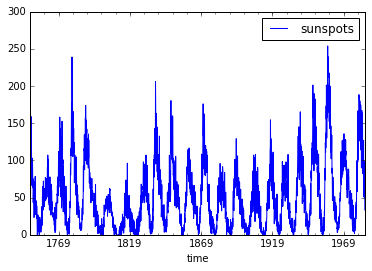

In [56]:
# データセットの取得
df = sm.datasets.get_rdataset('sunspots').data

# 日付変換 + 整形
def convert_date(date):
    month, year = math.modf(float(date))
    year = round(year)
    month = round(month / (1.0 / 12) + 1)
    return datetime.datetime(int(year), int(month), 1)

df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df.sunspots = df.sunspots.astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df.sunspots.as_matrix().tolist()

# 可視化
df.plot()

53.2135454548


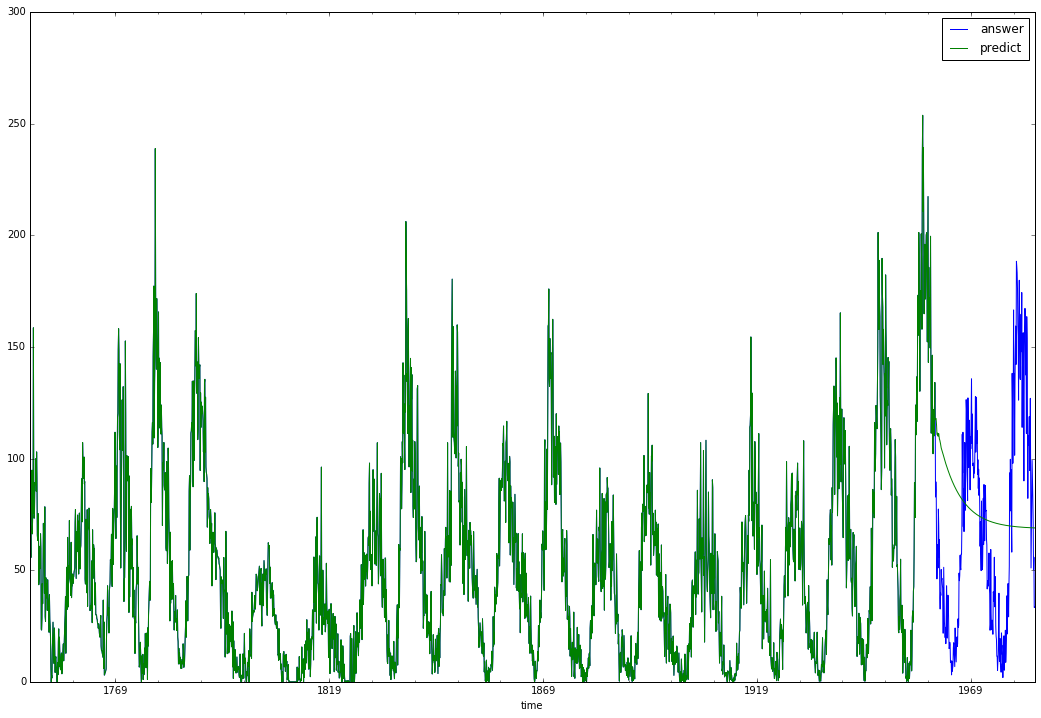

In [57]:
train_and_estimate2("AirPassengers")

# Nile Dataset

In [40]:
# データセットの取得
df = sm.datasets.get_rdataset('Nile').data
df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df.Nile = df.Nile.astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df.Nile.as_matrix().tolist()

# 可視化
df.plot()

AttributeError: 'DataFrame' object has no attribute 'Nile'

In [ ]:

train_and_estimate2('nile')

# UKDriverDeaths

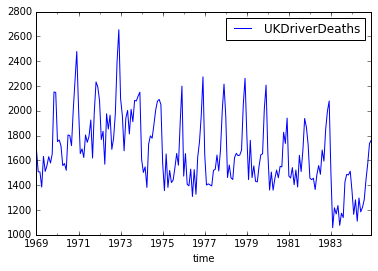

In [15]:
# データセットの取得
df = sm.datasets.get_rdataset('UKDriverDeaths').data

# 日付変換 + 整形
def convert_date(date):
    month, year = math.modf(float(date))
    year = round(year)
    month = round(month / (1.0 / 12) + 1)
    return datetime.datetime(int(year), int(month), 1)

df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df.UKDriverDeaths = df.UKDriverDeaths.astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df.UKDriverDeaths.as_matrix().tolist()

# 可視化
df.plot()

279.195070238


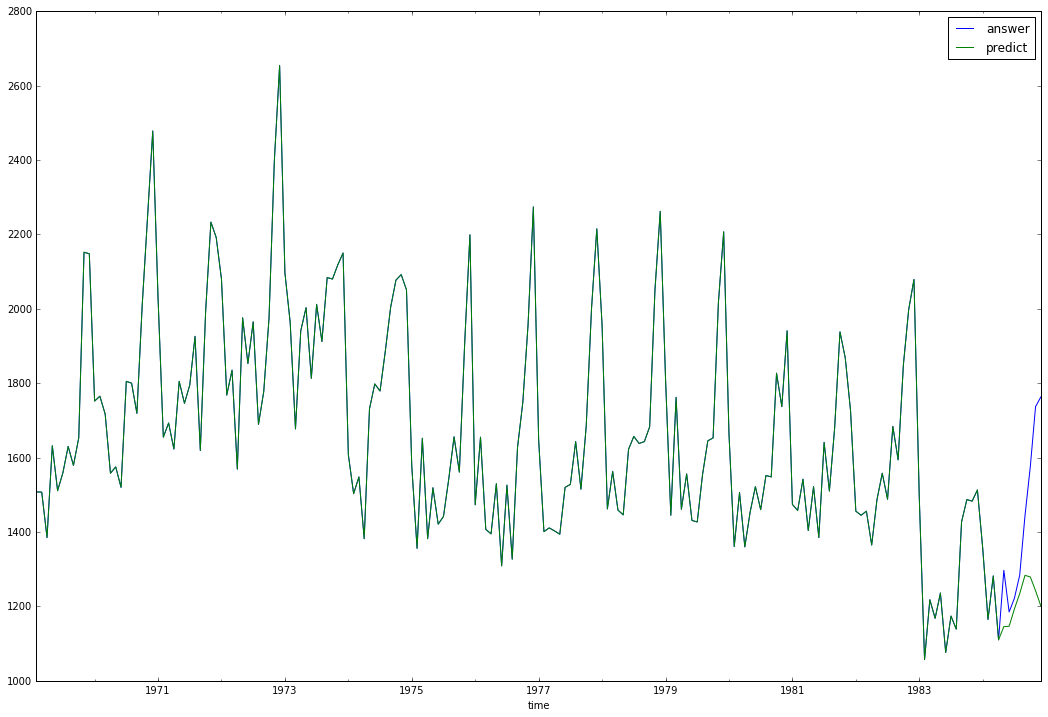

In [28]:
train_and_estimate2("ukdeath")

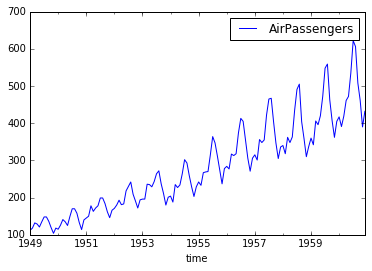

In [48]:
# データセットの取得
df = sm.datasets.get_rdataset('AirPassengers').data
df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df.Nile = df.AirPassengers.astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df.AirPassengers.as_matrix().tolist()

# 可視化
df.plot()

418.818683368


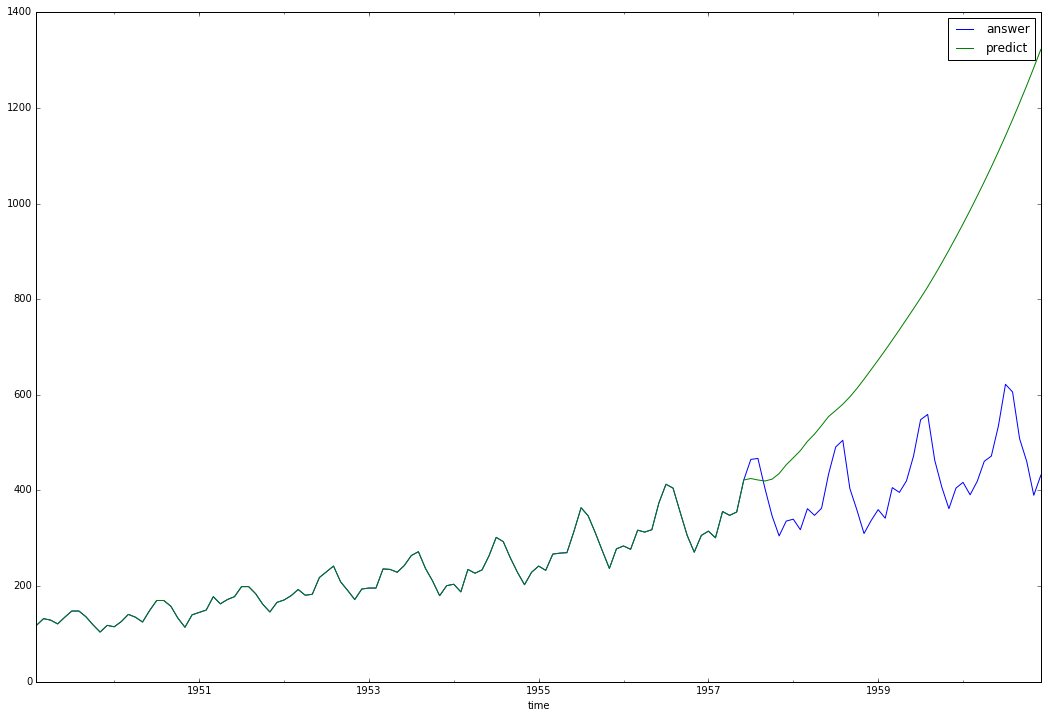

In [51]:
train_and_estimate2("AirPassengers")